In [2]:
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

from gensim.models import LdaModel, CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.utils import lemmatize

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
%matplotlib inline

In [3]:
PROJECT_PATH = '/Users/sorrosn/Desktop/ocr_images/postits'

data = pd.read_csv(f'{PROJECT_PATH}/data_priority_area_all.csv')
data.head()

,Unnamed: 0,group,name,text,clean_text
0,0,Data cleaning,note01 [Data cleaning].jpg,807 OF BIOB\nINFORMANES IS\nCLEANING ZORG\nis ...,biob informan clean zorg youget argel mace ins...
1,1,Data cleaning,note02 [Data cleaning].jpg,"Data cleaning\ngoolines of code,\ntoo was abou...",data clean goolin code clean data model st24
2,2,Data cleaning,note03 [Data cleaning].jpg,Data cleaning\nBiggest challenge\nI think we h...,data clean biggest challeng think tb48
3,3,Data cleaning,note04 [Data cleaning].jpg,"CLEANING DATA ..\nESSENTIAL, UN-\nREWALED A Wi...",clean data essenti rewal wiol answer
4,4,Data cleaning,note05 [Data cleaning].jpg,THAT IS PROSAIC\nBUT NEARU Tape\nINSURMOUNTABL...,prosaic nearu tape insurmount obstal current d...


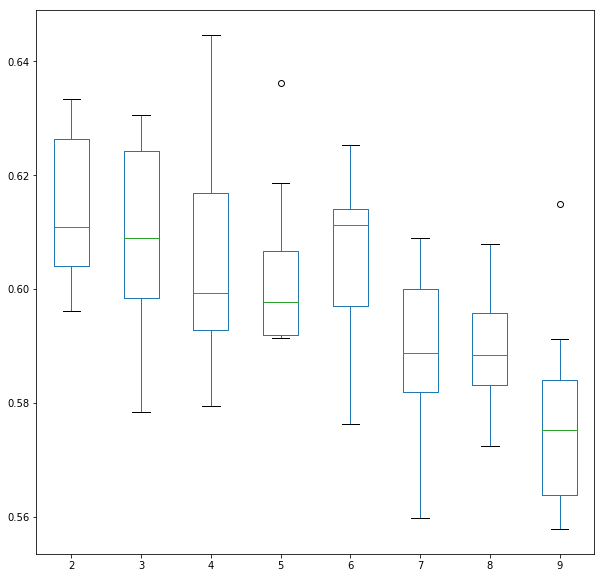

In [43]:
tf_vectorizer = CountVectorizer(min_df=2, stop_words='english')

# an unorthodox way to remove stopwords and rare words
tf_vectorizer.fit(data['clean_text'])
texts = tf_vectorizer.inverse_transform(tf_vectorizer.transform(data['clean_text']))

texts = [[word for word in line] for line in texts]

dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = {}
model_coherence = {}
for k in range(2,10):
    cv_k = []
    lda_k = []
    for i in range(10):
        ldaModel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=i)
        cv = CoherenceModel(model=ldaModel, texts=texts, dictionary=dictionary, coherence='c_v')
        cv_k.append(cv.get_coherence())
        lda_k.append(ldaModel)
    model_coherence[k] = cv_k
    lda_model[k] = lda_k
pd.DataFrame(model_coherence).plot.box(figsize=(10,10))

In [44]:
k = 8
random_state = 1
pyLDAvis.gensim.prepare(lda_model[k][random_state], corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.010944 -0.160290       1        1  11.985144
1      0.189231 -0.026912       2        1  19.786907
2      0.052669  0.089777       3        1  14.277962
3     -0.091886 -0.007138       4        1  11.983096
4     -0.075398 -0.061348       5        1   8.192706
5      0.063394  0.052733       6        1  13.271253
6     -0.100254  0.095040       7        1  11.496406
7     -0.026812  0.018137       8        1   9.006530, topic_info=     Category       Freq       Term      Total  loglift  logprob
term                                                            
12    Default  15.000000       dana  15.000000  30.0000  30.0000
3     Default  29.000000       data  29.000000  29.0000  29.0000
30    Default   7.000000       want   7.000000  28.0000  28.0000
117   Default   3.000000    privaci   3.000000  27.0000  27.0000
81    Default   4.000000       fund   4.000000  26.0000  26.0000
6     Default   5.000000   challeng   5.000000  25.0000  25.0000
44    Default  13.000000      peopl  13.000000  24.0000  24.0000
17    Default   4.000000      gener   4.000000  23.0000  23.0000
18    Default   7.000000    problem   7.000000  22.0000  22.0000
111   Default   3.000000     depend   3.000000  21.0000  21.0000
35    Default   4.000000     machin   4.000000  20.0000  20.0000
53    Default   2.000000     school   2.000000  19.0000  19.0000
28    Default   4.000000       dara   4.000000  18.0000  18.0000
22    Default   6.000000       time   6.000000  17.0000  17.0000
47    Default   7.000000      share   7.000000  16.0000  16.0000
55    Default   3.000000      learn   3.000000  15.0000  15.0000
72    Default   3.000000     provid   3.000000  14.0000  14.0000
134   Default   2.000000     credit   2.000000  13.0000  13.0000
0     Default   7.000000      clean   7.000000  12.0000  12.0000
115   Default   5.000000     record   5.000000  11.0000  11.0000
11    Default   9.000000       dama   9.000000  10.0000  10.0000
67    Default   3.000000       sure   3.000000   9.0000   9.0000
56    Default   3.000000      train   3.000000   8.0000   8.0000
57    Default   3.000000  scientist   3.000000   7.0000   7.0000
66    Default   3.000000    patient   3.000000   6.0000   6.0000
73    Default   3.000000   research   3.000000   5.0000   5.0000
40    Default   7.000000       need   7.000000   4.0000   4.0000
64    Default   3.000000     panent   3.000000   3.0000   3.0000
103   Default   3.000000       open   3.000000   2.0000   2.0000
101   Default   2.000000       pick   2.000000   1.0000   1.0000
...       ...        ...        ...        ...      ...      ...
49     Topic8   0.948808       mode   2.372245   1.4908  -3.8315
124    Topic8   0.948661   unstruct   2.372228   1.4907  -3.8317
89     Topic8   0.948721      point   2.384800   1.4855  -3.8316
19     Topic8   0.948668    softwar   2.384814   1.4854  -3.8317
25     Topic8   0.948509     driven   2.384792   1.4852  -3.8319
129    Topic8   0.948712      panen   2.397303   1.4802  -3.8316
105    Topic8   0.948489      manag   2.397282   1.4800  -3.8319
126    Topic8   0.948721      start   2.410134   1.4749  -3.8316
101    Topic8   0.948966       pick   2.482655   1.4455  -3.8314
35     Topic8   1.791924     machin   4.853082   1.4109  -3.1957
58     Topic8   0.948586       team   3.148425   1.2075  -3.8318
10     Topic8   0.948500    current   3.183418   1.1964  -3.8319
68     Topic8   0.948909      healm   3.233197   1.1813  -3.8314
24     Topic8   0.948483     scienc   3.233166   1.1809  -3.8319
4      Topic8   1.792266      model   7.081706   1.0332  -3.1955
18     Topic8   1.792347    problem   7.083282   1.0330  -3.1955
103    Topic8   0.948078       open   3.861892   1.0027  -3.8323
26     Topic8   0.948668       free   3.912393   0.9904  -3.8317
45     Topic8   0.948532      chang   3.959613   0.9782  -3.8318
41     Topic8   0.948500       test  

In [47]:
from operator import itemgetter

def get_topics(model, documents):
    texts = tf_vectorizer.inverse_transform(tf_vectorizer.transform(documents))
    texts = [[word for word in line] for line in texts]
    
    text_bow = [dictionary.doc2bow(text) for text in texts]
    return [max(model[text], key=itemgetter(1))[0]+1 for text in text_bow]

data['topic'] = get_topics(lda_model[k][random_state], data['clean_text'])

In [48]:
# 1 data share
# 2 data standard
# 3 data clean
# 4 EHR
data.groupby(['group', 'topic'])['name'].count()

group                   topic
Data cleaning           1         3
                        2        11
                        3         4
                        4         2
                        5         2
                        6         3
                        7         3
                        8         1
Data counceling         1         6
                        2         4
                        3         1
                        4         7
                        5         3
                        6         6
                        7         2
                        8         2
Data sharing            1         3
                        2         1
                        3         3
                        4         2
                        6         2
                        7         3
Data standards          1         4
                        2         7
                        3         5
                        4         3
                        5         

In [15]:
data.to_csv('/Users/sorrosn/Desktop/topics.csv')